CPU times: user 3.43 s, sys: 902 ms, total: 4.34 s
Wall time: 2.37 s


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 2D structured: (55, 65)'}, xlabel='$x$', ylabel='$y$'>

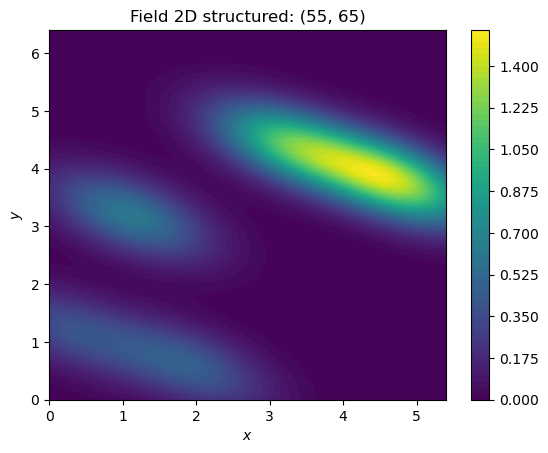

In [1]:
%%time

import numpy as np
import gstools as gs
import matplotlib.pyplot as plt

# load the data in
# conditioning data (x, y, values)
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

# convert data
x, y, val = data[:, 0], data[:, 1], data[:, 2]

# plt.scatter(x, y, val, cmap='viridis')  # Using 'viridis' colormap for better visualization



# grid definition for output field
gridx = np.arange(0.0, 5.5, 0.1)
gridy = np.arange(0.0, 6.5, 0.1)


# define the covariance model - gaussian
cov_model = gs.Gaussian(
    dim=2, len_scale=1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)


# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

EDK.structured([gridx, gridy])
EDK.plot()

In [2]:
%%time
#now i am going to do something similar in the code.  


import pandas as pd

# Specify the file path
file_path = "/Users/cui/Library/CloudStorage/OneDrive-YaleUniversity/0 Zongming Ma/hubmap/ann/B009A_22_03_03_Skywalker_reg001_compensated_ann.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

       cell_id:cell_id  region:region  tile_num:tile_num       x       y  z:z  \
0                  1.0            1.0                1.0  5168.0  5924.0  1.0   
1                  2.0            1.0                1.0  2943.0  1122.0  1.0   
2                  3.0            1.0                1.0  1891.0  7163.0  1.0   
3                  4.0            1.0                1.0  3629.0   381.0  1.0   
4                  5.0            1.0                1.0  7173.0  6848.0  1.0   
...                ...            ...                ...     ...     ...  ...   
36370          36371.0            1.0                1.0  5792.0  3761.0  1.0   
36371          36372.0            1.0                1.0  7646.0  3373.0  1.0   
36372          36373.0            1.0                1.0  3188.0  2277.0  1.0   
36373          36374.0            1.0                1.0  3348.0  6482.0  1.0   
36374          36375.0            1.0                1.0  6767.0  6567.0  1.0   

       x_tile:x_tile  y_til

In [3]:
import numpy as np
import gstools as gs

# we normalise x and y so that the grid is approximately 1 by 1

df['x'] = df['x']/10000
df['y'] = df['y']/10000
# Let x and y be the your collections of x and y locations
x = df['x']  
y = df['y']  



In [4]:
x.describe()

count    36375.000000
mean         0.671930
std          0.272255
min          0.000000
25%          0.603250
50%          0.783100
75%          0.857700
max          0.940600
Name: x, dtype: float64

In [5]:
y.describe() 

count    36375.000000
mean         0.460666
std          0.256830
min          0.000000
25%          0.217500
50%          0.470100
75%          0.693650
max          0.906900
Name: y, dtype: float64

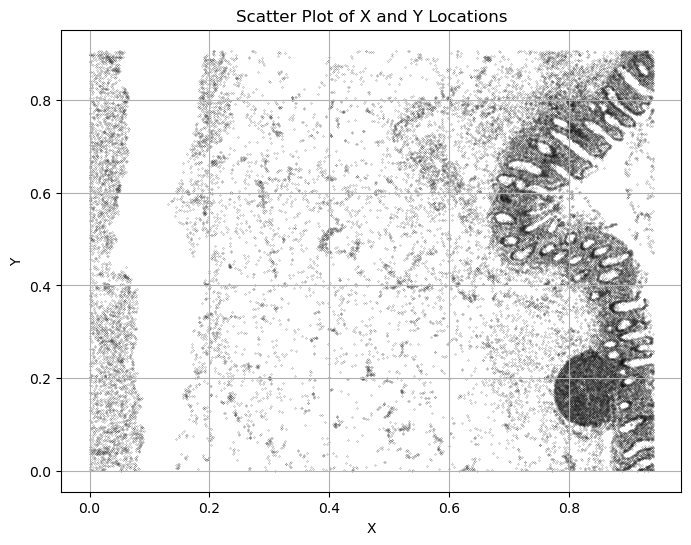

In [6]:
# let us get a sense of where these cell locations are.
import matplotlib.pyplot as plt
# Plot the x and y locations as dots
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', s=0.02)  # Adjust the color and size of the dots as needed
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y Locations')
plt.grid(True)
plt.show()

In [7]:
# now let us differentiate different types of cells by colour. 

cell_type = df['Cell Type'] 
cell_type.value_counts()
# cell_type

Cell Type
Smooth muscle       5194
Stroma              4251
Endothelial         3779
Enterocyte          3743
CD4+ T cell         2701
Goblet              2158
CD8+ T              2135
filtered            1733
M2 Macrophage       1709
Plasma              1426
Nerve               1350
Lymphatic           1302
ICC                  891
Cycling TA           852
DC                   700
B                    628
TA                   433
Neutrophil           420
CD66+ Enterocyte     402
M1 Macrophage        386
NK                    76
Neuroendocrine        63
CD7+ Immune           26
CD57+ Enterocyte       7
Paneth                 6
MUC1+ Enterocyte       4
Name: count, dtype: int64

In [8]:
unique_cell_types = df['Cell Type'].unique()
len(unique_cell_types)

26

In [9]:
# Define colors for each unique cell type
# Define a color map for different cell types
color_map = {}
colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'magenta',
    'cyan',
    'orange',
    'purple',
    'lime',
    'brown',
    'olive',
    'navy',
    'maroon',
    'gray',
    'teal',
    'silver',
    'gold',
    'purple',
    'tomato',
    'blueviolet',
    'yellow',
    'lime',
    'aqua',
    'darkviolet',
    'darkorange',
    'darkred'
]

# Add more colors if needed

for i, ctype in enumerate(unique_cell_types):
    color_map[ctype] = colors[i % len(colors)]  # Use modulo to cycle through colors if there are more cell types than colors

print("Color map for Cell Type:")
print(color_map)

Color map for Cell Type:
{'Stroma': 'red', 'Smooth muscle': 'green', 'filtered': 'blue', 'Enterocyte': 'yellow', 'M2 Macrophage': 'magenta', 'Plasma': 'cyan', 'B': 'orange', 'Cycling TA': 'purple', 'Lymphatic': 'lime', 'ICC': 'brown', 'CD8+ T': 'olive', 'CD4+ T cell': 'navy', 'Endothelial': 'maroon', 'Goblet': 'gray', 'TA': 'teal', 'DC': 'silver', 'Neutrophil': 'gold', 'Nerve': 'purple', 'CD66+ Enterocyte': 'tomato', 'M1 Macrophage': 'blueviolet', 'NK': 'yellow', 'Neuroendocrine': 'lime', 'Paneth': 'aqua', 'CD7+ Immune': 'darkviolet', 'CD57+ Enterocyte': 'darkorange', 'MUC1+ Enterocyte': 'darkred'}


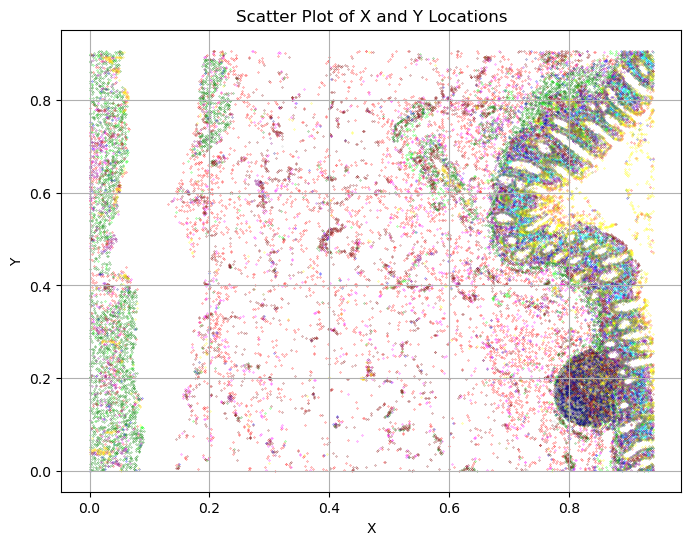

In [10]:
# now that we have so many different colours, let us plot the dots with colours

# Plot the x and y locations as dots with different colors based on cell type
plt.figure(figsize=(8, 6))
for ctype in color_map:
    x_sub = x[cell_type == ctype]
    y_sub = y[cell_type == ctype]
    plt.scatter(x_sub, y_sub, c=color_map[ctype], s=0.05)  # Use the 'c' argument with the list of colors
    # Adjust the size of the dots as needed

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y Locations')
# plt.legend() #the legends don't look too well 
plt.grid(True)
plt.show()

In [11]:
# # darker colours look nicer
# colors = [
#     '#8B0000',  # DarkRed
#     '#006400',  # DarkGreen
#     '#00008B',  # DarkBlue
#     '#8B008B',  # DarkMagenta
#     '#8B4513',  # SaddleBrown
#     '#556B2F',  # DarkOliveGreen
#     '#483D8B',  # DarkSlateBlue
#     '#800000',  # Maroon
#     '#008B8B',  # DarkCyan
#     '#2F4F4F',  # DarkSlateGray
#     '#A0522D',  # Sienna
#     '#008000',  # Green
#     '#800080',  # Purple
#     '#1E90FF',  # DodgerBlue
#     '#B22222',  # FireBrick
#     '#696969',  # DimGray
#     '#A52A2A',  # Brown
#     '#4682B4',  # SteelBlue
#     '#228B22',  # ForestGreen
#     '#483D8B',  # DarkSlateBlue
#     '#8B0000',  # DarkRed
#     '#006400',  # DarkGreen
#     '#00008B',  # DarkBlue
#     '#8B008B',  # DarkMagenta
#     '#8B4513',  # SaddleBrown
#     '#556B2F'   # DarkOliveGreen
# ]

# for i, ctype in enumerate(unique_cell_types):
#     color_map[ctype] = colors[i % len(colors)]  # Use modulo to cycle through colors if there are more cell types than colors

# # Plot the x and y locations as dots with different colors based on cell type
# plt.figure(figsize=(8, 6))
# for ctype in color_map:
#     x_sub = x[cell_type == ctype]
#     y_sub = y[cell_type == ctype]
#     plt.scatter(x_sub, y_sub, c=color_map[ctype], s=0.05)  # Use the 'c' argument with the list of colors
#     # Adjust the size of the dots as needed

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot of X and Y Locations')
# # plt.legend() #the legends don't look too well 
# plt.grid(True)
# plt.show()

In [12]:
#Good, let us now look at a particular biomarker, aka.. protein concentration level.

CD161 = df['CD161']
CD161.describe()

count    34642.000000
mean        -0.063565
std          0.132826
min         -0.157011
25%         -0.102391
50%         -0.084737
75%         -0.070482
max          3.535865
Name: CD161, dtype: float64

In [13]:
num_nan_entries = df['CD161'].isna().sum()
print("Number of NaN entries in CD161:", num_nan_entries)
print("Proportion of NaN entries in CD161:", df['CD161'].isna().sum()/len(CD161))

Number of NaN entries in CD161: 1733
Proportion of NaN entries in CD161: 0.0476426116838488


In [14]:
#let us just get rid of all the rows for which CD161 has NaN

# Remove rows with missing values in the 'CD161' column
df_cleaned = df.dropna(subset=['CD161'])

# Now df_cleaned contains only the rows where 'CD161' does not have missing values


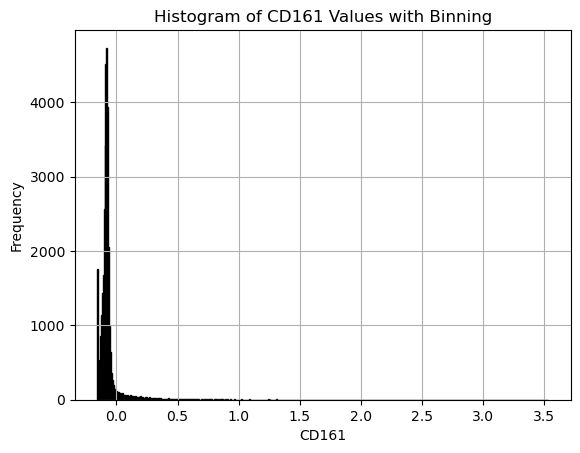

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'CD161' is the column containing values
cd161_values = df_cleaned['CD161']

# Define the number of bins
num_bins = 500  # You can adjust the number of bins as needed

# Create histogram with specified number of bins
plt.hist(cd161_values, bins=num_bins, edgecolor='black')
plt.xlabel('CD161')
plt.ylabel('Frequency')
plt.title('Histogram of CD161 Values with Binning')
plt.grid(True)
plt.show()

In [16]:
cd161_values.describe()

count    34642.000000
mean        -0.063565
std          0.132826
min         -0.157011
25%         -0.102391
50%         -0.084737
75%         -0.070482
max          3.535865
Name: CD161, dtype: float64

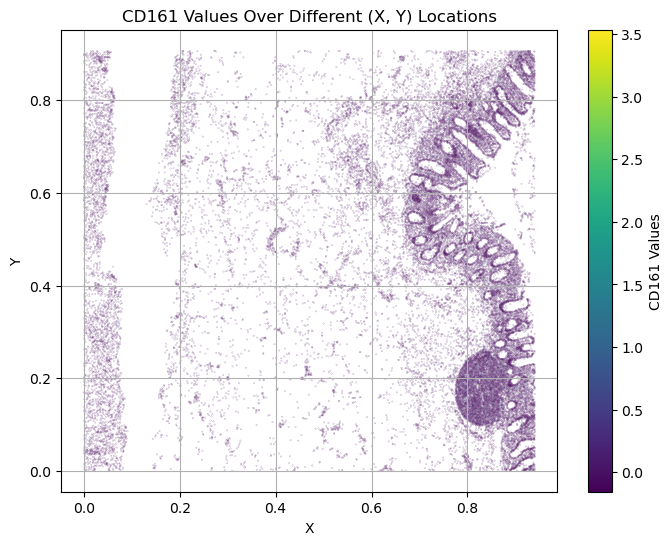

In [17]:
# a first attempt a plotting leads to no visible colour change, because most of the values are concentrated in a small band

df_cleaned = df.dropna(subset=['CD161'])
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the CD161 values over different (x, y) locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned['CD161'], cmap='viridis', s=0.01)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='CD161 Values')  # Add colorbar to show Synapto values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CD161 Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

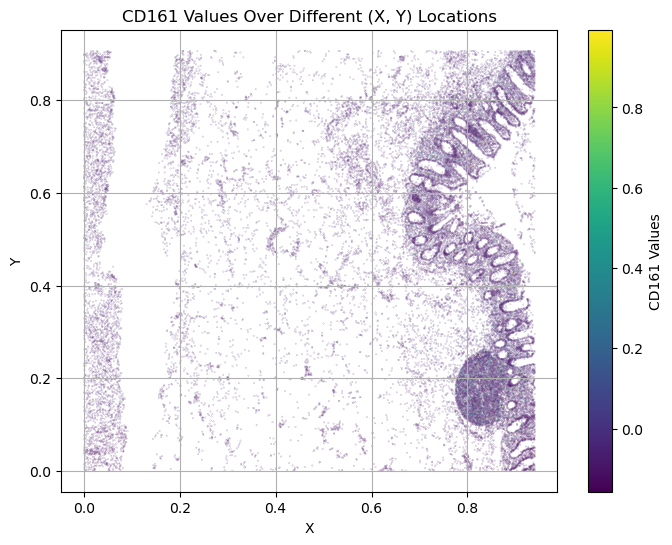

In [18]:
# let us try to plot it
# here is a scatter plot where the x and y coordinates represent the locations, 
# and the color or size of the points represents the "CD161" values. 
# # from the picture, most of the data come from (-0.16,0.7).

df_cleaned = df_cleaned[ df_cleaned['CD161']< 1]
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the CD161 values over different (x, y) locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned['CD161'], cmap='viridis', s=0.01)  # Using 'viridis' colormap for better visualization
# plt.scatter(x, y, c=cd161_values, s=0.02)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='CD161 Values')  # Add colorbar to show CD161 values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CD161 Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

In [19]:
# let us try to plot it
# here is a scatter plot where the x and y coordinates represent the locations, 
# and the color or size of the points represents the "CD161" values. 
# # from the picture, most of the data come from (-0.16,0.7).
protein = 'Synapto'
df_cleaned = df.dropna(subset=[protein])
df_cleaned[protein].describe()

count    34642.000000
mean        -0.060609
std          0.842033
min         -0.296755
25%         -0.296755
50%         -0.276173
75%         -0.202030
max         26.067007
Name: Synapto, dtype: float64

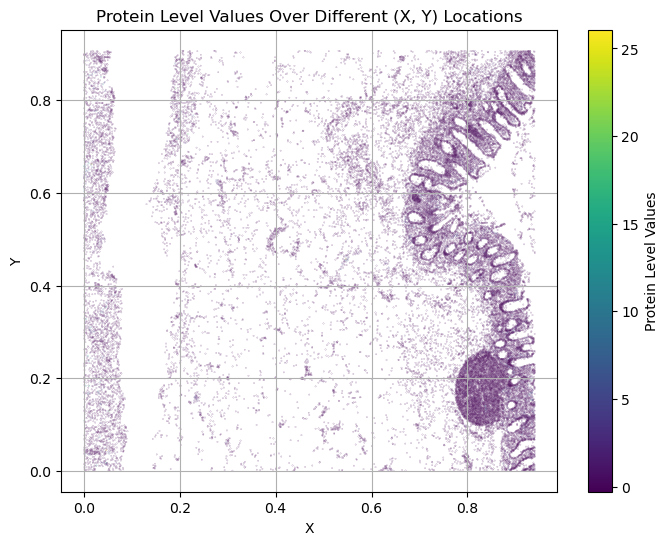

In [20]:
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the CD161 values over different (x, y) locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned[protein], cmap='viridis', s=0.01)  # Using 'viridis' colormap for better visualization
# plt.scatter(x, y, c=cd161_values, s=0.02)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Protein Level Values')  # Add colorbar to show protein values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Protein Level Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

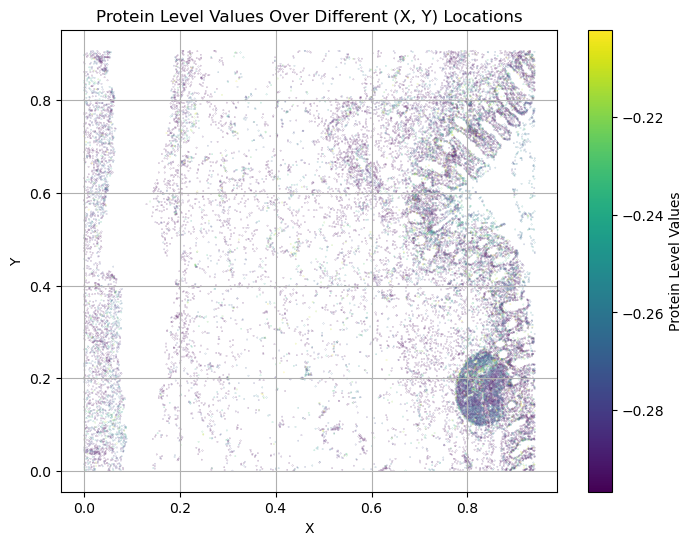

In [21]:
#Once again, we only see any visible colour changes after throwing away the high expression values.

df_cleaned = df_cleaned[df_cleaned[protein]< -0.202]
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the CD161 values over different (x, y) locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned[protein], cmap='viridis', s=0.01)  # Using 'viridis' colormap for better visualization
# plt.scatter(x, y, c=cd161_values, s=0.02)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Protein Level Values')  # Add colorbar to show protein values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Protein Level Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

In [45]:
# How often do outliers appear?
# Consider the criteria that $val$ > mean + 10 * (75%-25%) 
protein = 'Synapto'
df_cleaned = df.dropna(subset=[protein])
threshold = -0.060609+10*(-0.202030 + 0.296755)
df_outlier = df_cleaned[ df_cleaned[protein] > threshold]
df_outlier[protein].describe()

count    1803.000000
mean        2.532552
std         2.413513
min         0.886816
25%         1.230796
50%         1.757764
75%         2.833772
max        26.067007
Name: Synapto, dtype: float64

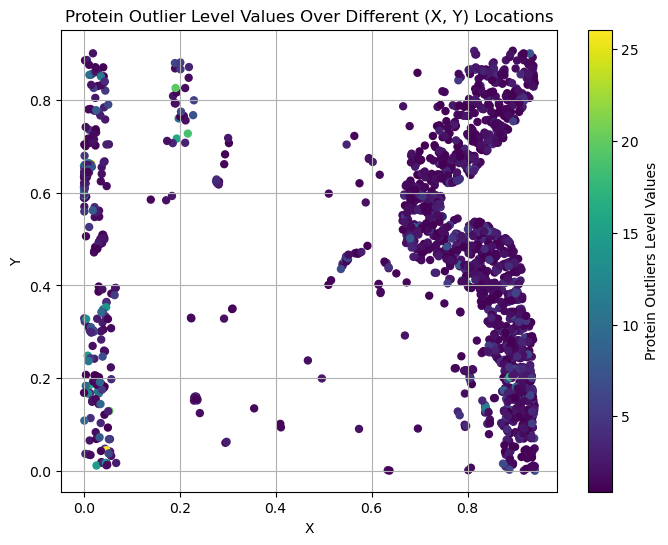

In [46]:
# Plot the CD161 values over different (x, y) locations among outliers
plt.figure(figsize=(8, 6))
plt.scatter(df_outlier['x'], df_outlier['y'], c=df_outlier[protein], cmap='viridis', s=25)  # Using 'viridis' colormap for better visualization
# plt.scatter(x, y, c=cd161_values, s=0.02)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Protein Outliers Level Values')  # Add colorbar to show protein values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Protein Outlier Level Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

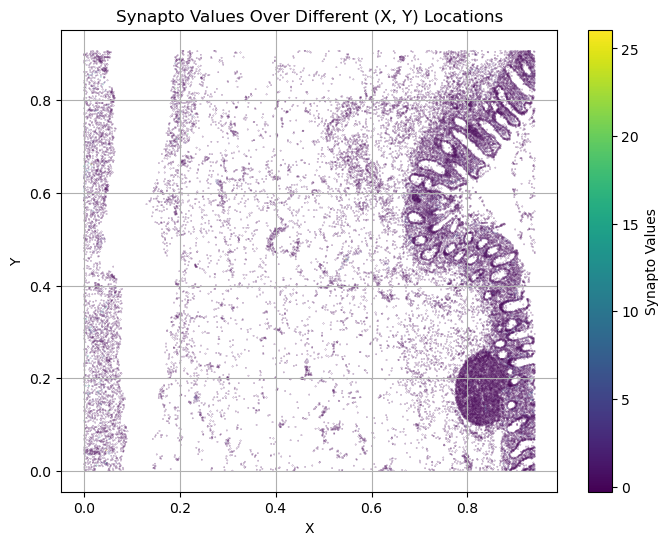

In [49]:
#We can probably formalise the process and try it with a different protein
df_cleaned = df.dropna(subset=['Synapto'])

x = df_cleaned['x']
y = df_cleaned['y']
# Plot the Synapto values over different (x, y) locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned['Synapto'], cmap='viridis', s=0.02)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Synapto Values')  # Add colorbar to show Synapto values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synapto Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


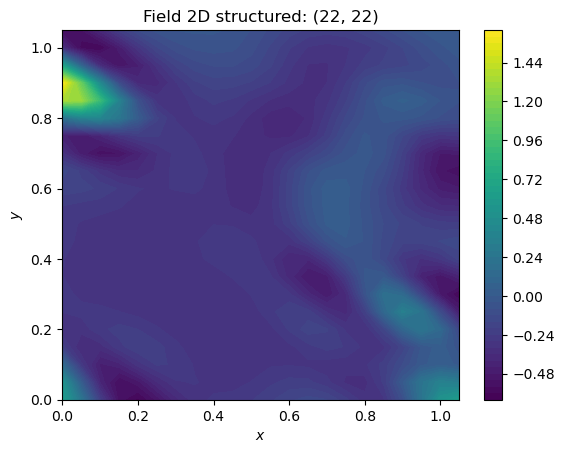

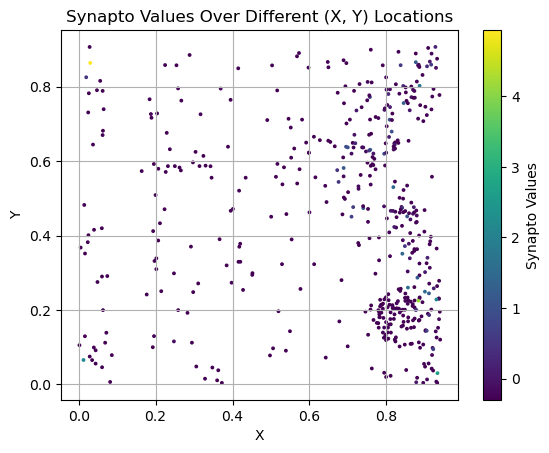

CPU times: user 3.66 s, sys: 994 ms, total: 4.66 s
Wall time: 774 ms


In [62]:
%%time
# You really cannot tell the difference between the two, but at least the range of values are different

# define the covariance model - gaussian
cov_model = gs.Gaussian(
    # dim=2, len_scale=1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
    dim=2, len_scale=0.2, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)


# grid definition for output field
gridx = np.arange(0.0, 1.1, 0.05)
gridy = np.arange(0.0, 1.1, 0.05)

protein='Synapto'

df_cleaned = df.dropna(subset=[protein])
df_cleaned = df_cleaned.head(500)
x = df_cleaned['x']
y = df_cleaned['y']
val = df_cleaned[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

EDK.structured([gridx, gridy])
EDK.plot()
plt.show()

#We can probably formalise the process and try it with a different protein
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the Synapto values over different (x, y) locations
# plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned['Synapto'], cmap='viridis', s=3)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Synapto Values')  # Add colorbar to show Synapto values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synapto Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()


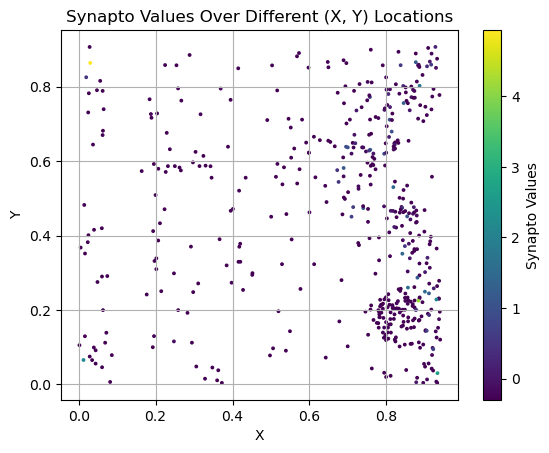

In [56]:

#We can probably formalise the process and try it with a different protein
x = df_cleaned['x']
y = df_cleaned['y']
# Plot the Synapto values over different (x, y) locations
# plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned['Synapto'], cmap='viridis', s=3)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='Synapto Values')  # Add colorbar to show Synapto values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synapto Values Over Different (X, Y) Locations')
plt.grid(True)
plt.show()

In [52]:
df_cleaned

,cell_id:cell_id,region:region,tile_num:tile_num,x,y,z:z,x_tile:x_tile,y_tile:y_tile,size:size,cyc001_ch001:Hoechst1,...,Cell subtype,machine,MUC6,Neighborhood,Neighborhood_Ind,Neigh_sub,NeighInd_sub,Community,Major Community,Tissue Segment
0,1.0,1.0,1.0,0.5168,0.5924,1.0,5168.0,5924.0,640.0,343.734371,...,Stromal,Skywalker,-0.094094,Stroma,Stroma,Stromal,Stromal,Stroma,Stroma,Subucosa
1,2.0,1.0,1.0,0.2943,0.1122,1.0,2943.0,1122.0,441.0,237.337866,...,Stromal,Skywalker,-0.102342,Stroma & Innate Immune,Neuroendocrine Enriched,Stromal,Epithelial,Stroma,Stroma,Subucosa
2,3.0,1.0,1.0,0.1891,0.7163,1.0,1891.0,7163.0,124.0,915.274183,...,Stromal,Skywalker,-0.082603,Smooth Muscle,Smooth Muscle,Stromal,Stromal,Smooth Muscle,Smooth Muscle,Muscle
3,4.0,1.0,1.0,0.3629,0.0381,1.0,3629.0,381.0,389.0,262.107966,...,Stromal,Skywalker,-0.102959,Stroma,Stroma,Stromal,Stromal,Stroma,Stroma,Subucosa
5,6.0,1.0,1.0,0.8775,0.4348,1.0,8775.0,4348.0,122.0,2510.574628,...,Epithelial,Skywalker,-0.093830,Mature Epithelial,Mature Epithelial,Epithelial,Epithelial,Secretory Epithelial,Epithelial,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,622.0,1.0,1.0,0.3455,0.5553,1.0,3455.0,5553.0,433.0,361.621243,...,Stromal,Skywalker,-0.093429,Stroma,Stroma,Stromal,Stromal,Stroma,Stroma,Subucosa
622,623.0,1.0,1.0,0.8767,0.2000,1.0,8767.0,2000.0,296.0,19484.187173,...,Immune,Skywalker,-0.100900,Adatpive Immune Enriched,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa
623,624.0,1.0,1.0,0.5196,0.1966,1.0,5196.0,1966.0,295.0,244.922031,...,Stromal,Skywalker,-0.106243,Stroma,Neuroendocrine Enriched,Stromal,Epithelial,Stroma,Stroma,Subucosa
624,625.0,1.0,1.0,0.8848,0.1715,1.0,8848.0,1715.0,121.0,1043.072902,...,Immune,Skywalker,-0.120032,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


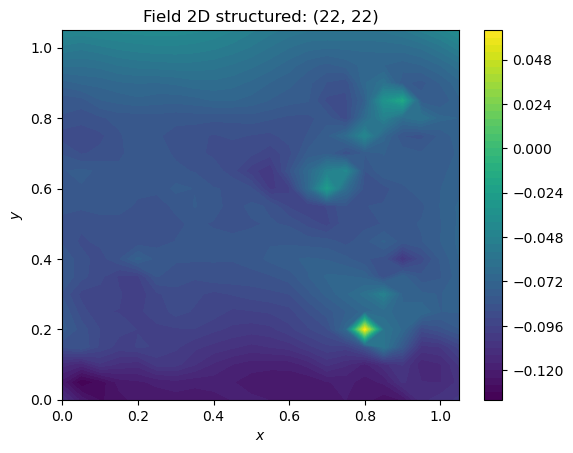

CPU times: user 3.5 s, sys: 1.01 s, total: 4.51 s
Wall time: 573 ms


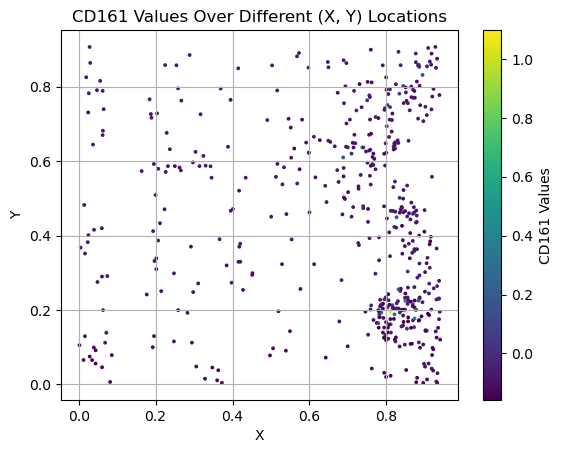

In [82]:
%%time

# grid definition for output field
gridx = np.arange(0.0, 1.1, 0.05)
gridy = np.arange(0.0, 1.1, 0.05)

protein='CD161'

df_cleaned = df.dropna(subset=[protein])
df_cleaned = df_cleaned.head(500)
x = df_cleaned['x']
y = df_cleaned['y']
val = df_cleaned[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

EDK.structured([gridx, gridy])
EDK.plot() 
plt.show()

#We can probably formalise the process and try it with a different protein
x = df_cleaned['x']
y = df_cleaned['y']
# plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=df_cleaned[protein], cmap='viridis', s=3)  # Using 'viridis' colormap for better visualization
plt.colorbar(label='CD161 Values')  # Add colorbar to show CD161 values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CD161 Values Over Different (X, Y) Locations')
plt.grid(True)

CPU times: user 11.4 s, sys: 814 ms, total: 12.2 s
Wall time: 1.16 s


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 2D structured: (22, 22)'}, xlabel='$x$', ylabel='$y$'>

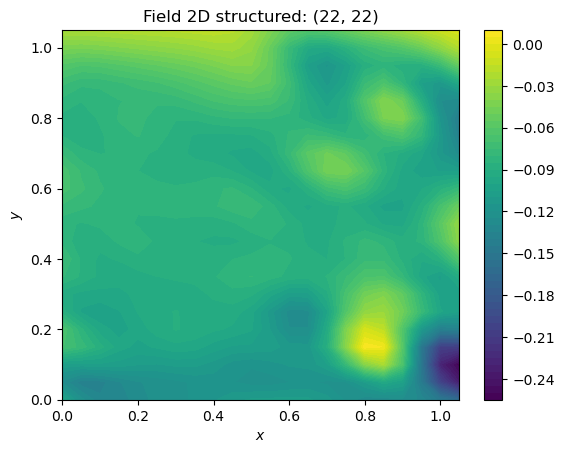

In [64]:
%%time
# grid definition for output field
gridx = np.arange(0.0, 1.1, 0.05)
gridy = np.arange(0.0, 1.1, 0.05)

protein='CD161'


df_cleaned = df.dropna(subset=[protein])
# df_cleaned = df_cleaned.head(2000)
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

EDK.structured([gridx, gridy])
EDK.plot() 

In [65]:
x

0       0.5168
1       0.2943
2       0.1891
3       0.3629
5       0.8775
         ...  
1208    0.8729
1209    0.8661
1210    0.9132
1211    0.4516
1212    0.8561
Name: x, Length: 1000, dtype: float64

In [66]:
##
# Suppose now that we have stored the kridge output field in EDK.  How do we compute a list of predictions?
protein='CD161'
protein='Synapto'

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]

CPU times: user 21.9 s, sys: 1.01 s, total: 22.9 s
Wall time: 2.03 s


In [67]:
predictions - truth

3506   -0.005367
3507    0.261904
3508    0.231549
3509    0.101920
3511   -0.070336
          ...   
4611    0.378225
4612   -0.016810
4613    0.035043
4614    0.005448
4615   -0.015822
Name: Synapto, Length: 999, dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(predictions, truth)

mse



0.4616016438535039

In [103]:
np.mean(truth**2)

0.026159694215703962

In [86]:
mse/np.mean(truth**2)

0.937020124776725

In [87]:
mae/np.mean(np.abs(truth))

0.70878263974704

In [69]:
# Suppose now that we have stored the kridge output field in EDK.  How do we compute a list of predictions?

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(2000)['x']
y = df_cleaned.head(2000)['y']
val = df_cleaned.head(2000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(predictions, truth)

mse

0.46193775005218646

In [99]:
# Suppose now that we have stored the kridge output field in EDK.  How do we compute a list of predictions?

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(3000)['x']
y = df_cleaned.head(3000)['y']
val = df_cleaned.head(3000)[protein]

cov_model = gs.Gaussian(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)

x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(predictions, truth)

mse

0.02088886399589169

In [101]:
mse/np.mean(truth**2)

0.7985133092019044

In [73]:
#strangely the MSE gets worse as data size increases!

In [102]:
np.mean(truth**2)

0.026159694215703962

In [89]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Exponential(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.02300483619481224

In [90]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Matern(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.021905440348661858

In [91]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Stable(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.02243507201486167

In [92]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Rational(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.02173279649405773

In [93]:
#Linear Model doesn't work for 2d data sets

# # Let us contrast the choice of different covariance models!
# # covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# # define the covariance model - gaussian
# cov_model = gs.Linear(
#     dim=2, len_scale=1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
# )

# df_cleaned = df.dropna(subset=[protein])
# x = df_cleaned.head(1000)['x']
# y = df_cleaned.head(1000)['y']
# val = df_cleaned.head(1000)[protein]

# # perform the kriging and plot
# EDK = gs.krige.Simple(
#     model=cov_model, 
#     cond_pos=(x, y), 
#     cond_val=val,
# )
# x_unseen = df_cleaned[3001:4000]['x']
# y_unseen = df_cleaned[3001:4000]['y']
# predictions,sigma = EDK([x_unseen,y_unseen])
# truth = df_cleaned[3001:4000][protein]
# # Calculate mean squared error (MSE)
# mse = mean_squared_error(predictions, truth)
# mse



In [94]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Circular(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.02325397204145373

In [95]:
# Let us contrast the choice of different covariance models!
# covmodels = [Gaussian, Exponential, Matern, Stable, Rational, Linear, Circular, Spherical]
# define the covariance model - gaussian
cov_model = gs.Spherical(
    dim=2, len_scale=0.1, anis=0.5, angles=-0.5, var=0.5, nugget=0.1
)

df_cleaned = df.dropna(subset=[protein])
x = df_cleaned.head(1000)['x']
y = df_cleaned.head(1000)['y']
val = df_cleaned.head(1000)[protein]

# perform the kriging and plot
EDK = gs.krige.Simple(
    model=cov_model, 
    cond_pos=(x, y), 
    cond_val=val,
)
x_unseen = df_cleaned[3001:4000]['x']
y_unseen = df_cleaned[3001:4000]['y']
predictions,sigma = EDK([x_unseen,y_unseen])
truth = df_cleaned[3001:4000][protein]
# Calculate mean squared error (MSE)
mse = mean_squared_error(predictions, truth)
mse

0.02394947916416151

In [96]:
# The choice of the cov models do not really make any difference.  Strange.